#  **Cardiac Stroke prediction**


### 1) Problem statement
-  Cardiac strokes are a major health concern and detecting the risk of a stroke early can save lives. This project aims to build a computer program that can predict if a person is likely to have a cardiac stroke. We will use information like age, gender, blood pressure, heart health, glucose level, body weight, and smoking habits.


### 2) Data Collection
- Dataset Source - Data provided by client.
- The data consists of 22 column and 9722 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [11]:
!pip install --upgrade scikit-learn
!pip install mysql-connector-python
#!pip install feature-engine
#!pip install scikit-learn imbalanced-learn
#!pip install --upgrade imbalanced-learn scikit-learn
#!pip uninstall scikit-learn imbalanced-learn

In [2]:
import pandas as pd                   # Data Manipulation
import numpy as np                    # Numeric Calculation
import seaborn as sns                 # Advance Data Visualization
import matplotlib.pyplot as plt       # Data Visualization
import scipy.stats as stats           # Normal Quantile-Quantile Plot
import pylab
import warnings                       # Warnings
warnings.filterwarnings('ignore')
# Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import sklearn.metrics as skmet       # Confusion matrix
import mysql.connector as sql         # for SQL connection

In [3]:
df=pd.read_csv('Dataset\healthcare-dataset-stroke-data.csv')

#### Show Top 5 Records


In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
print(df['stroke'].unique())

[1 0]


In [7]:
df.shape

(5110, 12)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [8]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### There are missing values in the data set

### 3.2 Check Duplicates

In [9]:
df.duplicated().sum()

0

### 3.3 Check data types

In [10]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### 3.4 Checking the number of unique values of each column

In [11]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

### 3.5 Check statistics of data set

In [12]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### 3.7 Exploring Data

In [13]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [15]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'ever_married' variable:     ",end=" " )
print(df['ever_married'].unique())

print("Categories in 'work_type' variable:  ",end=" ")
print(df['work_type'].unique())

print("Categories in 'Residence_type' variable:",end=" " )
print(df['Residence_type'].unique())

print("Categories in 'smoking_status' variable:     ",end=" " )
print(df['smoking_status'].unique())


Categories in 'gender' variable:      ['Male' 'Female' 'Other']
Categories in 'ever_married' variable:      ['Yes' 'No']
Categories in 'work_type' variable:   ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Categories in 'Residence_type' variable: ['Urban' 'Rural']
Categories in 'smoking_status' variable:      ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [41]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

We have 5 categorical features : ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [46]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### 4. Exploring Data ( Visualization )


#### 4.1 First Moment Business Decision
Measure of Central Tendency

In [57]:
# Assuming df is your DataFrame and 'column_name' is the name of the column
mapping = {
    'Male': 1,
    'Female': 0,
    'Other': 2,
    

}


df['gender'] = df['gender'].replace(mapping).astype(float)


In [58]:
mapping = {
    
    'Yes': 1,
    'No' : 0, 
}

df['ever_married'] = df['ever_married'].replace(mapping).astype(float)

In [60]:
mapping = {
    'Private': 0, 
    'Self-employed': 1, 
    'Govt_job': 2, 
    'children': 3, 
    'Never_worked': 4,


}
df['work_type'] = df[ 'work_type'].replace(mapping).astype(float)


In [62]:
mapping = {
   
    'Urban': 0,
    'Rural': 1,


}
df[ 'Residence_type'] = df[ 'Residence_type'].replace(mapping).astype(float)


In [63]:
mapping = {
    
    'formerly smoked': 0, 
    'never smoked': 1, 
    'smokes': 2, 
    'Unknown': 3

}
df[  'smoking_status'] = df['smoking_status'].replace(mapping).astype(float)


In [64]:
df.mean()

id                   36517.829354
gender                   0.414286
age                     43.226614
hypertension             0.097456
heart_disease            0.054012
ever_married             0.656164
work_type                0.837965
Residence_type           0.491977
avg_glucose_level      106.147677
bmi                     28.893237
smoking_status           1.585519
stroke                   0.048728
dtype: float64

In [65]:
df.median()

id                   36932.000
gender                   0.000
age                     45.000
hypertension             0.000
heart_disease            0.000
ever_married             1.000
work_type                0.000
Residence_type           0.000
avg_glucose_level       91.885
bmi                     28.100
smoking_status           1.000
stroke                   0.000
dtype: float64

In [66]:
df.mode()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,67,0.0,78.0,0.0,0.0,1.0,0.0,0.0,93.88,28.7,1.0,0.0
1,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,72911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5106,72914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5107,72915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5108,72918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 4.2 Second Moment Business Decision
Measure of Dispersion

In [67]:
df.var()

id                   4.478185e+08
gender               2.430920e-01
age                  5.113318e+02
hypertension         8.797552e-02
heart_disease        5.110447e-02
ever_married         2.256568e-01
work_type            1.251485e+00
Residence_type       2.499845e-01
avg_glucose_level    2.050601e+03
bmi                  6.168636e+01
smoking_status       1.193605e+00
stroke               4.636264e-02
dtype: float64

In [68]:
df.std()

id                   21161.721625
gender                   0.493044
age                     22.612647
hypertension             0.296607
heart_disease            0.226063
ever_married             0.475034
work_type                1.118698
Residence_type           0.499985
avg_glucose_level       45.283560
bmi                      7.854067
smoking_status           1.092522
stroke                   0.215320
dtype: float64

#### 4.3 Third Moment Business Decision
Skewness

In [69]:
df.skew()

id                  -0.019913
gender               0.353012
age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
ever_married        -0.657745
work_type            0.972287
Residence_type       0.032107
avg_glucose_level    1.572284
bmi                  1.055340
smoking_status       0.077863
stroke               4.193284
dtype: float64

#### 4.4 Fourth Moment Business Decision
Kurtosis

In [70]:
df.kurt()

id                   -1.212368
gender               -1.862882
age                  -0.991010
hypertension          5.375456
heart_disease        13.586052
ever_married         -1.567985
work_type            -0.518026
Residence_type       -1.999752
avg_glucose_level     1.680479
bmi                   3.362659
smoking_status       -1.348560
stroke               15.589736
dtype: float64

## 5. Graphical Representation
### 5.1 Univariate Analysis
### 5.1.1 Histogram and Barplot

In [ ]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        plt.hist(df[col], bins=20, alpha=0.5)
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.title("Histogram of : " + col)
        plt.show()
    elif df[col].dtype == 'object':
        value_counts = df[col].value_counts()
        plt.bar(value_counts.index, value_counts.values)
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.title("Bar Plot of : " + col)
        plt.xticks(rotation=45)
        plt.show()

### 5.1.2 Distplot and Countplot

In [ ]:
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        sns.distplot(df[col])
        plt.title(col)
        plt.show()
    else:
        if df[col].nunique():
            sns.countplot(data=df, x=col)
        plt.title(col)
        plt.xticks(rotation=45)
        plt.show()

### 5.1.3 Boxplot

In [ ]:
for col in df.columns:
    plt.figure(figsize=(6, 4))
    if np.issubdtype(df[col].dtype, np.number):
        sns.boxplot(data=df, y=col)
    else:
        sns.boxplot(data=df, x=col, y='age')  # Replace 'D Age' with a numeric column
    plt.title(f"Boxplot of : {col}")
    plt.xticks(rotation=45)
    plt.show()

### 5.1.4 Count Plot

In [ ]:
for col in df.columns:
    if df[col].nunique() :
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col)
        plt.title(f"Count Plot of : {col}")
        plt.xticks(rotation=45)
        plt.show()

### 5.1.5 Normal Q-Q plot

In [ ]:
# Checking Whether data is normally distributed

for col in df.columns:
    plt.figure(figsize=(6, 4))
    if df[col].dtype in ['int64', 'float64']:
        stats.probplot(df[col], dist="norm", plot=pylab)
        plt.title(f"Normal Q-Q Plot of : {col}")
        plt.show()

In [75]:
# Print Q-Q plot statistics for all columns
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        qq_plot_stats = stats.probplot(df[col], dist="norm", plot=None)
        observed_values = qq_plot_stats[0]  # This contains the sorted observed values
        print(f"{col} :")
        print("Observed values:", observed_values)
        print()

id :
Observed values: (array([-3.6412931, -3.4063133, -3.2768215, ...,  3.2768215,  3.4063133,
        3.6412931]), array([   67,    77,    84, ..., 72915, 72918, 72940], dtype=int64))

gender :
Observed values: (array([-3.6412931, -3.4063133, -3.2768215, ...,  3.2768215,  3.4063133,
        3.6412931]), array([0., 0., 0., ..., 1., 1., 2.]))

age :
Observed values: (array([-3.6412931, -3.4063133, -3.2768215, ...,  3.2768215,  3.4063133,
        3.6412931]), array([8.0e-02, 8.0e-02, 1.6e-01, ..., 8.2e+01, 8.2e+01, 8.2e+01]))

hypertension :
Observed values: (array([-3.6412931, -3.4063133, -3.2768215, ...,  3.2768215,  3.4063133,
        3.6412931]), array([0, 0, 0, ..., 1, 1, 1], dtype=int64))

heart_disease :
Observed values: (array([-3.6412931, -3.4063133, -3.2768215, ...,  3.2768215,  3.4063133,
        3.6412931]), array([0, 0, 0, ..., 1, 1, 1], dtype=int64))

ever_married :
Observed values: (array([-3.6412931, -3.4063133, -3.2768215, ...,  3.2768215,  3.4063133,
        3.6412931])

### 5.1.6 Pie chart

<Axes: ylabel='count'>

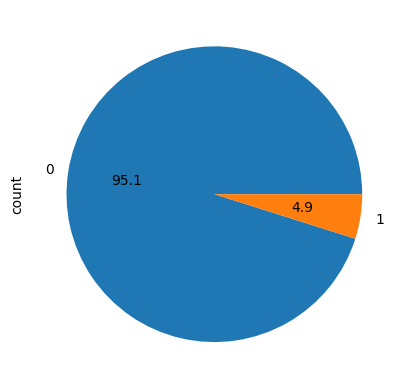

In [71]:
# Pie chart to check the ratio of data

df["stroke"].value_counts().plot.pie(autopct = '%.1f')

## Heatmap

<Axes: >

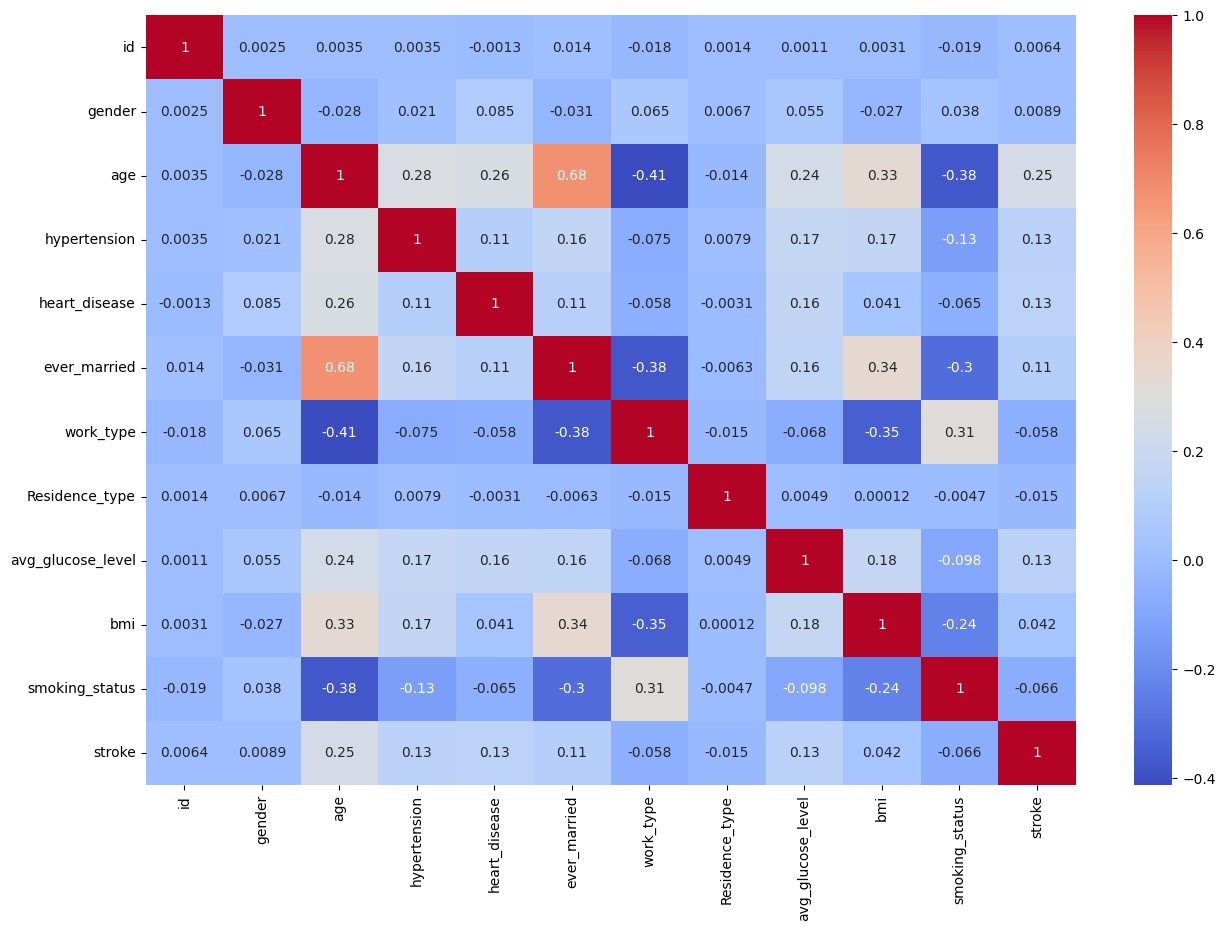

In [72]:
# Creating heatmap

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [73]:
# Correlation matrix

df.corr()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,0.002511,0.003538,0.003550,-0.001296,0.013690,-0.018030,0.001403,0.001092,0.003084,-0.018551,0.006388
gender,0.002511,1.000000,-0.028202,0.020994,0.085447,-0.031005,0.065306,0.006738,0.055180,-0.026678,0.037957,0.008929
age,0.003538,-0.028202,1.000000,0.276398,0.263796,0.679125,-0.413270,-0.014180,0.238171,0.333398,-0.375845,0.245257
hypertension,0.003550,0.020994,0.276398,1.000000,0.108306,0.164243,-0.075097,0.007913,0.174474,0.167811,-0.129012,0.127904
heart_disease,-0.001296,0.085447,0.263796,0.108306,1.000000,0.114644,-0.058263,-0.003092,0.161857,0.041357,-0.064671,0.134914
ever_married,0.013690,-0.031005,0.679125,0.164243,0.114644,1.000000,-0.375944,-0.006261,0.155068,0.341695,-0.303694,0.108340
work_type,-0.018030,0.065306,-0.413270,-0.075097,-0.058263,-0.375944,1.000000,-0.014573,-0.068135,-0.347241,0.307774,-0.058224
Residence_type,0.001403,0.006738,-0.014180,0.007913,-0.003092,-0.006261,-0.014573,1.000000,0.004946,0.000122,-0.004656,-0.015458
avg_glucose_level,0.001092,0.055180,0.238171,0.174474,0.161857,0.155068,-0.068135,0.004946,1.000000,0.175502,-0.097732,0.131945
bmi,0.003084,-0.026678,0.333398,0.167811,0.041357,0.341695,-0.347241,0.000122,0.175502,1.000000,-0.235740,0.042374


## 5.3 Multivariate Analysis using Pair plot

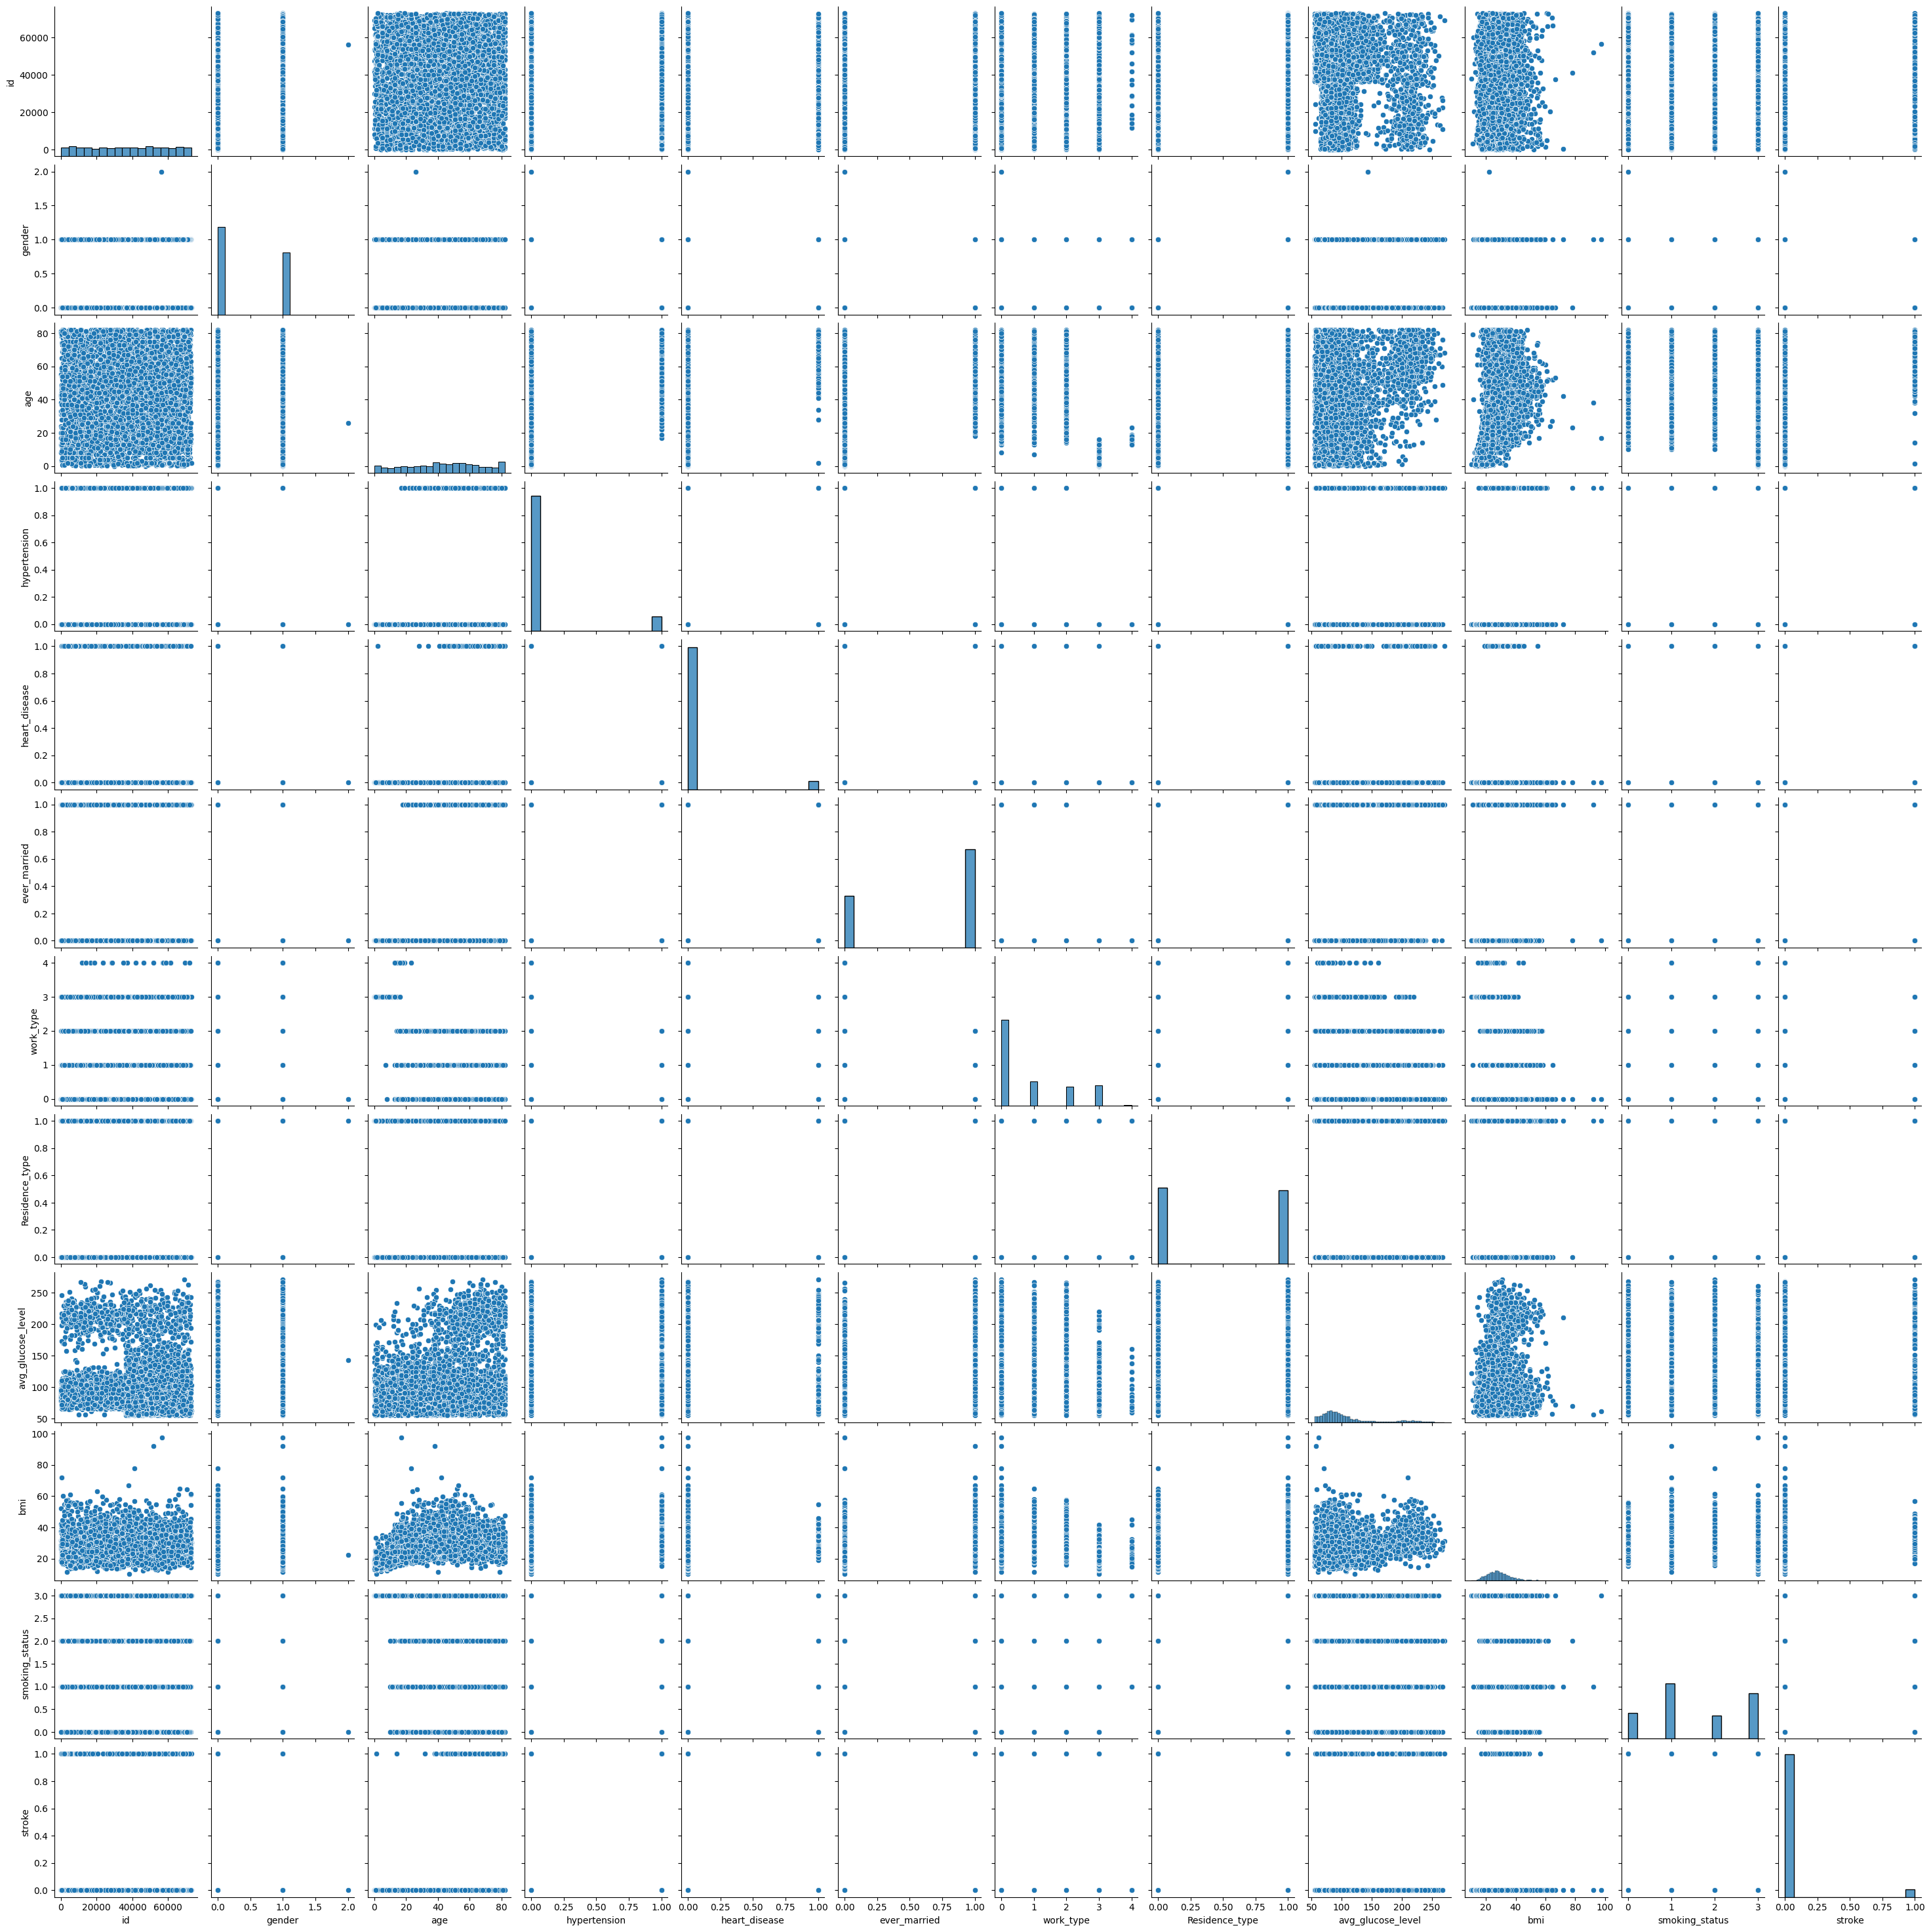

In [74]:
# Pair plot between the variables
sns.pairplot(df)